In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#from google.colab import files
#from google.colab.patches import cv2_imshow

Kép feltöltése és betöltése.

(800, 600, 3)


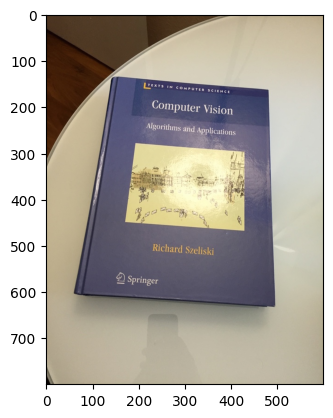

In [4]:
#uploaded = files.upload()
#img_path = list(uploaded.keys())[0]
image = cv2.imread(f"book2.jpg")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Konvolúciós kernel megadása.

In [5]:
kernel = np.array([[-1., -1., -1.], [0.,  0., 0.], [1., 1., 1.]]) / 1
print(kernel)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


Konvolúció kiszámítása. Ez a verzió a negatív értékeket nem kezeli.

In [6]:
conv_output = cv2.filter2D(image, -1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
min = np.min(conv_output)
print(min)

0


Eredmények megjelenítse.

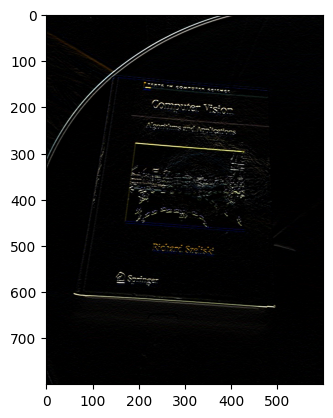

In [7]:
#plt.imshow(image)
plt.imshow(cv2.cvtColor(conv_output, cv2.COLOR_BGR2RGB))

Ebben az esetben már a negatív értékekkel is számolunk, azokat a kirajzolás előtt át kell alakítani....

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.497202527569243e-15..255.00000000000003].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..539.0].


-539.0
3.497202527569243e-15 255.00000000000003


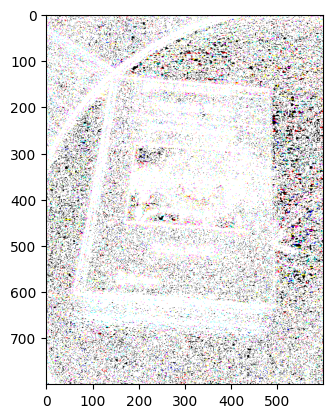

In [8]:
conv_output = cv2.filter2D(image.astype('float'), -1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
min = np.min(conv_output)
print(min)
conv_output_normalized = cv2.normalize(conv_output, None, 0.0, 255, cv2.NORM_MINMAX)
min = np.min(conv_output_normalized)
max = np.max(conv_output_normalized)
print(min,max)
conv_output_abs = np.abs(conv_output)
#cv2_imshow(conv_output_normalized)
plt.imshow(conv_output_normalized, cmap='gray')
#cv2_imshow(conv_output_abs)
plt.imshow(conv_output_abs, cmap='gray')
